# Вам представлены данные об оттоке клиентов некоторого банка.

In [83]:
import pandas as pd
import plotly
import plotly.express as px
print(plotly.__version__)

churn_data = pd.read_csv('data/churn.csv')
display(churn_data)
churn_data1 = churn_data.copy()

5.15.0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Столбцы таблицы:

- RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
- CustomerId — идентификатор клиента
- Surname — фамилия клиента
- CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
- Geography — страна клиента (банк международный)
- Gender — пол клиента
- Age — возраст клиента
- Tenure — сколько лет клиент пользуется услугами банка
- Balance — баланс на счетах клиента в банке
- NumOfProducts — количество услуг банка, которые приобрёл клиент
- HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
- IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
- EstimatedSalary — предполагаемая заработная плата клиента
- Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

# ЗАДАНИЯ

* 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

* 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

* 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

* 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

* 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

* 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

* 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

* 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

* 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

* 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# churn_data.info()

### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

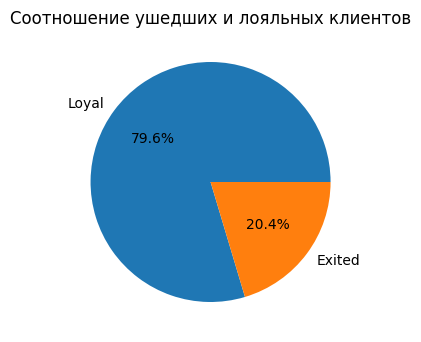

In [107]:
churn_data['Exited'] = churn_data['Exited'].astype('str');

status = churn_data['Exited']


for i in range(len(status)):
    if status[i] == '1':
        status[i] = 'Exited'
    elif status[i] == '0':
        status[i] = 'Loyal'
loyal = churn_data['Exited'].value_counts()   
fig = plt.figure(figsize=(3, 3));
axes = fig.add_axes([0, 0, 1, 1]);
axes.pie(
    loyal,
    labels=loyal.index,
    autopct='%.1f%%',
);
plt.title('Соотношение ушедших и лояльных клиентов')
plt.show()

    Каждый пятый клиент не лоялен банку. 

### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

Text(0.5, 1.0, 'Распределение баланса пользователей, свыше 2500$ на счету')

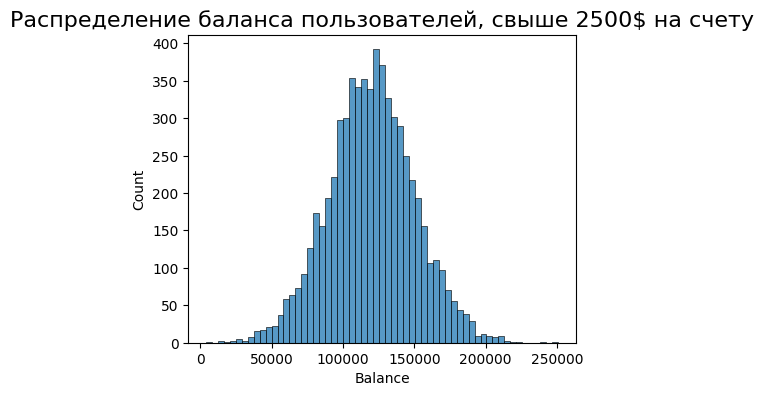

In [87]:
less = churn_data['Balance'] > 2500

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
sns.histplot(
    data=churn_data[less],
    x='Balance',
    # bins=25,
    kde=False,
    ax=axes
);
axes.set_title('Распределение баланса пользователей, свыше 2500$ на счету', fontsize=16)

    У большинства пользователей на счету хранится от 50 до 200 тыс. $

Text(0.5, 1.0, 'Распределение баланса пользователей, свыше 2500$ на счету')

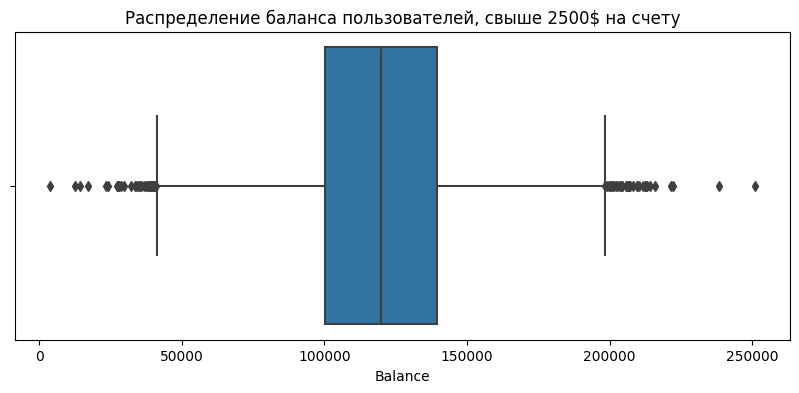

In [108]:
fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(
    data=churn_data[less],
    x='Balance',
    orient='h',
    width=0.9
);
plt.title('Распределение баланса пользователей, свыше 2500$ на счету')

    Коробка с усами это подтверждает.

 ### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.


Text(0.5, 1.0, 'Распределение баланса средств клиентов')

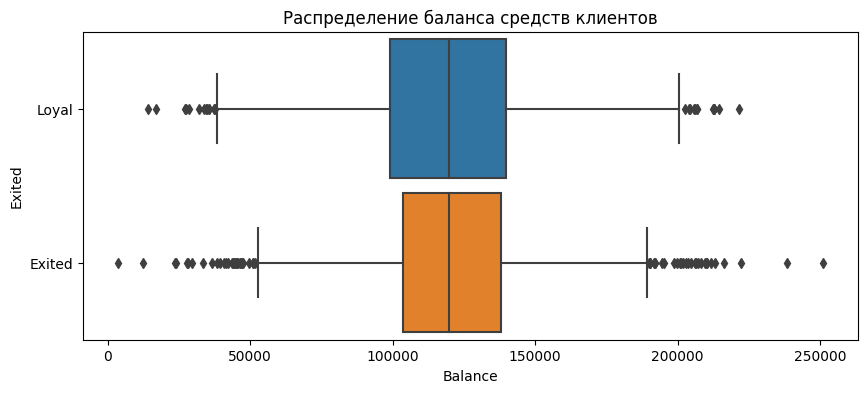

In [110]:
fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(
    data=churn_data[less],
    x='Balance',
    y='Exited',
    orient='h',
    width=0.9
);
plt.title('Распределение баланса средств клиентов')

    Балланс ушедших и лояльных клиентов не имеет заметных различий. Трудно сделать вывод о причинах ухода только по баллансу. 

### 9.4 Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

Text(0.5, 1.0, 'Лояльность клиентов в зависимости от возраста')

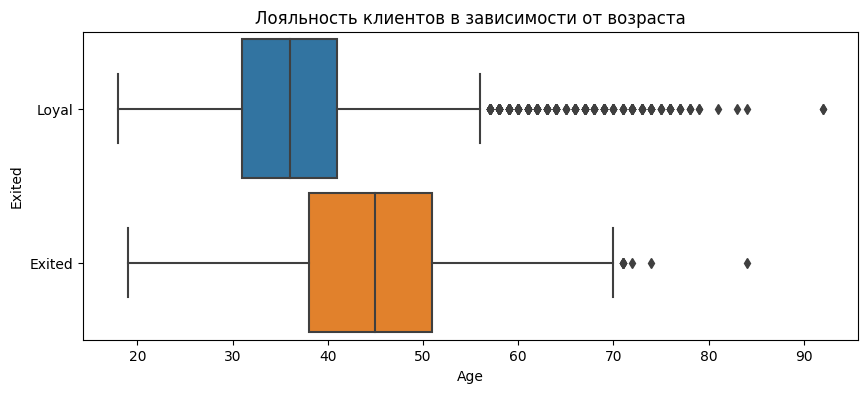

In [111]:
fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(
    data=churn_data[less],
    x='Age',
    y='Exited',
    orient='h',
    width=0.9
);

plt.title('Лояльность клиентов в зависимости от возраста')

    Среди лояльных клиентов как правило молодые люди,в возрасте от 20-55 лет. Среди нелояльных так же есть молодые, но межквартальный размах и медиана смещены к более зрелому возрасту, к тому же среди нелояльных есть клиенты старже 55 лет, тогда как среди лояльных такие случаи единичны. Вероятно стоит обратить внимание на клиентов более зрелого возраста от 55 до 70 лет. 

###  9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.


Text(0, 0.5, 'Вероятная зарплата')

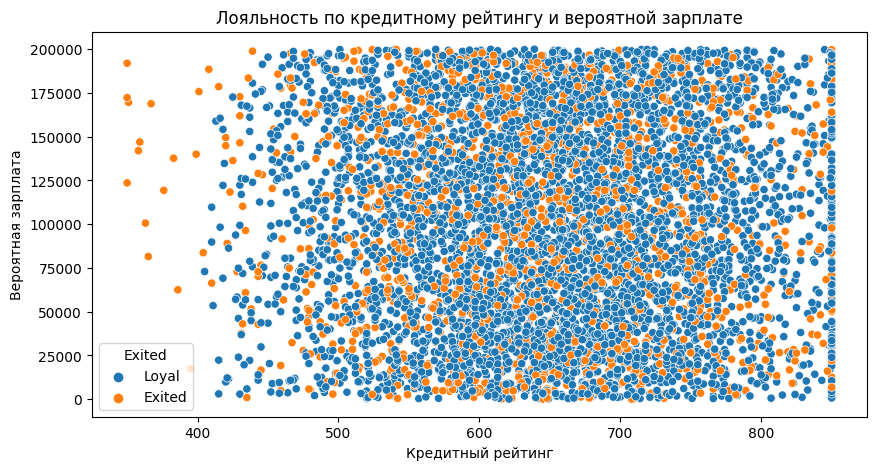

In [101]:
fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=churn_data[less],
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited'
);

plt.title('Лояльность по кредитному рейтингу и вероятной зарплате')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Вероятная зарплата')

    Можно заметить, разве что, то что клиенты с кредитным рейтингом ниже 400 теряют лояльность со 100% вероятность, однако их число значительно меньше клиентов с более высоким рейтингом, и тем не менее ушедшими. В целом кредитный рейтинг и предпологаемая зарплата не отражает лояльность клиентов. 

### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

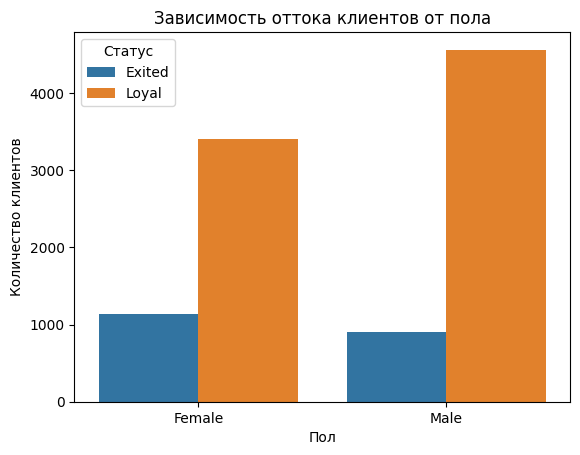

In [92]:
sns.countplot(
    x='Gender',
    hue='Exited',
    data=churn_data
)

plt.title('Зависимость оттока клиентов от пола')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.legend(title='Статус')
plt.show()

    Женщины уходят чаще чем мужчины.

### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

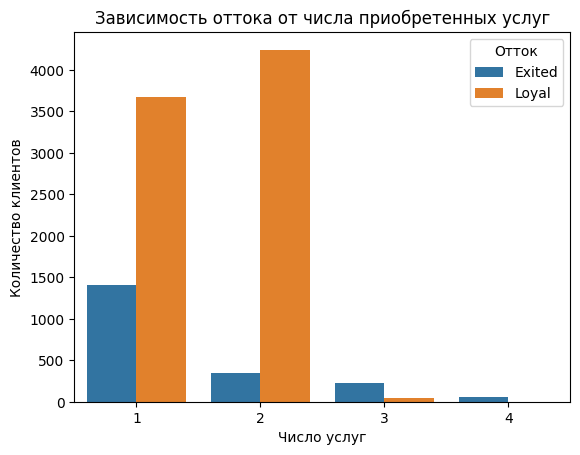

In [93]:

sns.countplot(
    x='NumOfProducts',
    hue='Exited',
    data=churn_data
);


plt.title('Зависимость оттока от числа приобретенных услуг')
plt.xlabel('Число услуг')
plt.ylabel('Количество клиентов')
plt.legend(title='Отток')
plt.show()

    Клиенты которые приобрели 1-2 услуги чаще остаются лояльны, чем те кто приобрёл 3-4. Зная какие именно услуги приобретал клиент можно было бы сказать конкретнее что именно больше привлекает, а что разочаровывает. 

### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [112]:
df = pd.DataFrame({
    'Exited': churn_data['Exited'],
    'IsActiveMember': churn_data['IsActiveMember'].map({0: 'Неактивный', 1: 'Активный'})
})

fig = px.sunburst(
    data_frame=df,
    path=['Exited', 'IsActiveMember'],
    values=[1] * len(churn_data),
    height=400,
    width=400,
    title='Кто чаще уходит?',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.show()

    Вполне ожидаемо, что среди ушедших клиентов - большая часть неактивны. 

    Среди лояльных, неактивных почти на тысячу человек меньше чем активных. 

    Можно сделать вывод что чем активнее клиент тем выше вероятность его лояльности. 

### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.


In [96]:
country_churn_data = churn_data1.groupby('Geography')['Exited'].mean().reset_index()

# display(churn_data)

fig = px.choropleth(
    data_frame=country_churn_data,  # DataFrame с агрегированными данными
    locations="Geography",  # столбец с локациями (странами)
    locationmode="country names",  # режим сопоставления локаций с базой Plotly
    color="Exited",  # доля ушедших клиентов
    range_color=[0, 1],  # диапазон цвета (доля будет отображаться от 0 до 1)
    title='Отток клиентов по странам',  # заголовок
    width=800,  # ширина
    height=500,  # высота
    color_continuous_scale='Reds'  # палитра цветов
)

# Отображение графика
fig.show()





    Доля ушедших клиентов выше в Германии. Можно предположить что в Германии больше ушедших клиентов, поскольку среди нелояльных клиентов присутсвуют люди в возрасте 55-70 лет, а наиболее ярко выраждены демографические проблемы и общее старение населения именно в Германии.  

### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.


Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

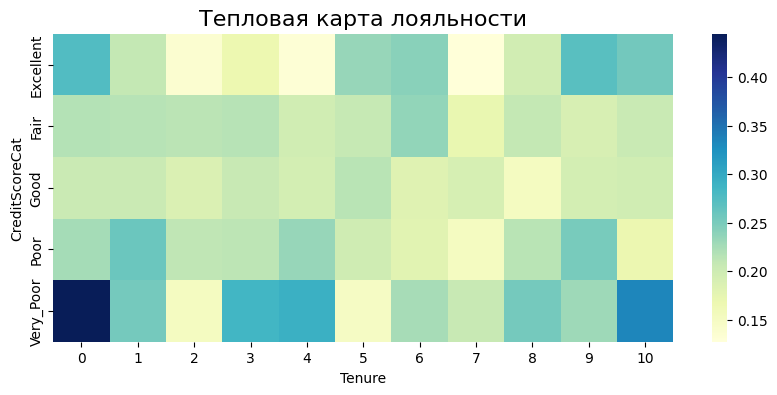

In [104]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
credit_score = churn_data1['CreditScore']

churn_data1['CreditScoreCat'] = credit_score.apply(get_credit_score_cat)

score = churn_data1.groupby(['CreditScoreCat','Tenure'])['Exited'].mean().unstack()
# display(score)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
heatmap = sns.heatmap(data=score, cmap='YlGnBu')
heatmap.set_title('Тепловая карта лояльности', fontsize=16);

    Чаще всего, вполне ожидаемо, уходят клиенты с самым низким кредитным рейтингом, в первый год пользования услуг банка. На карте так же видно что клиенты с низким кредитным рейтингом чаще других оказываются нелояльны, особенно на 4 и 10 год пользования что тоже объяснимо. Однако некоторое количество клиентов с превосходным рейтингом уходят в первый же год, а так же на 9-10 год пользования услугами банка, это нетипично, и говорит возможно о несовершенстве сервисов банка. Очевидно стоит обратить на это внимание. 